<a href="https://colab.research.google.com/github/ShreyasP20/Machine_Learning/blob/main/TimeSeriesPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
funnel = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Copy of AssignmentData.xlsx')

In [ ]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN


In [ ]:
funnel.shape

(1197, 7)

In [ ]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1197 non-null   object 
 1   Quarter                1197 non-null   object 
 2   Department             1197 non-null   object 
 3   Targeted Productivity  1197 non-null   float64
 4   Overtime               1197 non-null   int64  
 5   No. of Workers         1197 non-null   float64
 6   Actual Productivity    1167 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 65.6+ KB


In [ ]:
funnel.describe()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197.000000,1197.000000,1197.000000,1167.000000
mean,0.729632,4567.460317,34.609858,0.734882
std,0.097891,3348.823563,22.197687,0.174629
min,0.070000,0.000000,2.000000,0.233705
25%,0.700000,1440.000000,9.000000,0.650272
50%,0.750000,3960.000000,34.000000,0.773333
75%,0.800000,6960.000000,57.000000,0.850176
max,0.800000,25920.000000,89.000000,1.120437


In [ ]:
funnel.dropna(inplace=True)

In [ ]:
funnel.shape

(1167, 7)

In [ ]:
funnel['Target Achieved'] = funnel.apply(lambda row: 'Yes' if row['Actual Productivity'] > row['Targeted Productivity'] else 'No', axis=1)


In [ ]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes


In [ ]:
total_overtime_per_dept = funnel.groupby('Department')['Overtime'].sum()
average_workers_per_quarter = funnel.groupby('Quarter')['No. of Workers'].mean()
total_productivity_achieved = funnel['Actual Productivity'].sum()
total_observations_per_dept = funnel.groupby('Department').size()
average_productivity_per_dept = funnel.groupby('Department')['Actual Productivity'].mean()

print("Summary of Results:")
print("1. Total Overtime per Department:")
print(total_overtime_per_dept)
print("\n2. Average Number of Workers per Quarter:")
print(average_workers_per_quarter)
print("\n3. Total Productivity Achieved across all Quarters:", total_productivity_achieved)
print("\n4. Total Number of Observations per Department:")
print(total_observations_per_dept)
print("\n5. Average Productivity per Department:")
print(average_productivity_per_dept)

Summary of Results:
1. Total Overtime per Department:
Department
Finishing     958440
Sewing       4355180
Name: Overtime, dtype: int64

2. Average Number of Workers per Quarter:
Quarter
Q1    34.730769
Q2    33.914373
Q3    36.036585
Q4    33.948133
Q5    32.348837
Name: No. of Workers, dtype: float64

3. Total Productivity Achieved across all Quarters: 857.6071554460001

4. Total Number of Observations per Department:
Department
Finishing    496
Sewing       671
dtype: int64

5. Average Productivity per Department:
Department
Finishing    0.751526
Sewing       0.722579
Name: Actual Productivity, dtype: float64


<Figure size 1000x600 with 0 Axes>

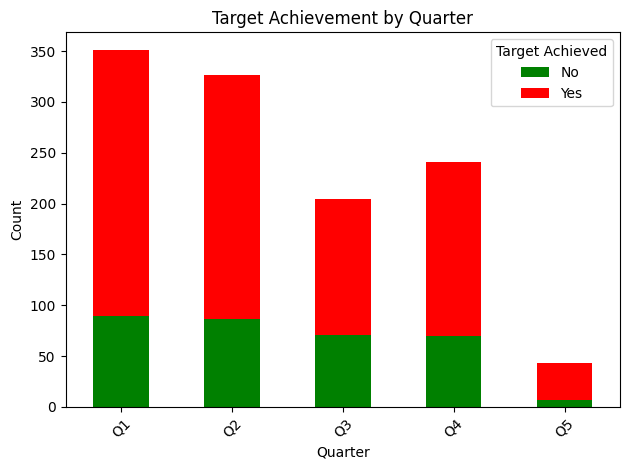

In [ ]:
grouped_data = funnel.groupby(['Quarter', 'Target Achieved']).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=['green', 'red'])

plt.title('Target Achievement by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target Achieved')

plt.tight_layout()
plt.show()

The graph provides a visual representation of the target achievement status ("Yes" and "No") over quarters.
You can observe the trend of target achievement over time, whether it improves or declines.
Comparing the heights of the "Yes" and "No" bars for each quarter gives an insight into the overall success rate of achieving targets.
Any significant changes or patterns in the distribution of target achievements across quarters can be identified easily from the graph.

In [ ]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 1196
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1167 non-null   datetime64[ns]
 1   Quarter                1167 non-null   object        
 2   Department             1167 non-null   object        
 3   Targeted Productivity  1167 non-null   float64       
 4   Overtime               1167 non-null   int64         
 5   No. of Workers         1167 non-null   float64       
 6   Actual Productivity    1167 non-null   float64       
 7   Target Achieved        1167 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 114.3+ KB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


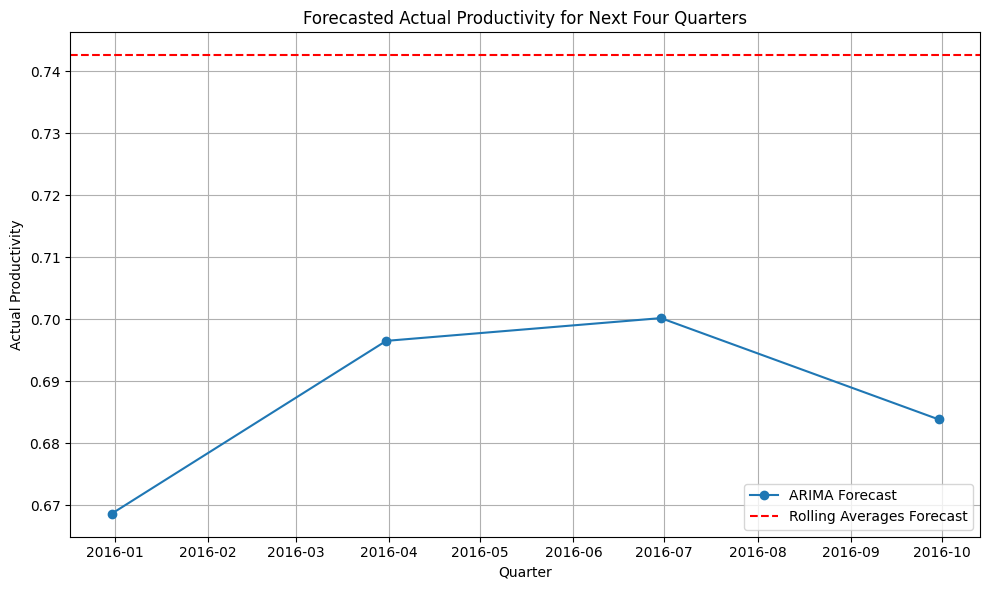

In [ ]:
funnel['Date_r'] = pd.to_datetime(funnel['Date'])

# Set Date column as index
funnel.set_index('Date_r', inplace=True)

# Sort DataFrame by Date
funnel.sort_index(inplace=True)

# Forecast using ARIMA
model = ARIMA(funnel['Actual Productivity'], order=(5,1,0))
arima_results = model.fit()
forecast_arima = arima_results.forecast(steps=4)

# Forecast using Rolling Averages
rolling_avg_forecast = funnel['Actual Productivity'].rolling(window=4).mean().iloc[-1]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting ARIMA forecast
plt.plot(pd.date_range(start=funnel.index[-1], periods=4, freq='Q'), forecast_arima, label='ARIMA Forecast', marker='o')

# Plotting Rolling Averages forecast
plt.axhline(y=rolling_avg_forecast, color='red', linestyle='--', label='Rolling Averages Forecast')

# Adding labels and title
plt.title('Forecasted Actual Productivity for Next Four Quarters')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.legend()

# Showing plot
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


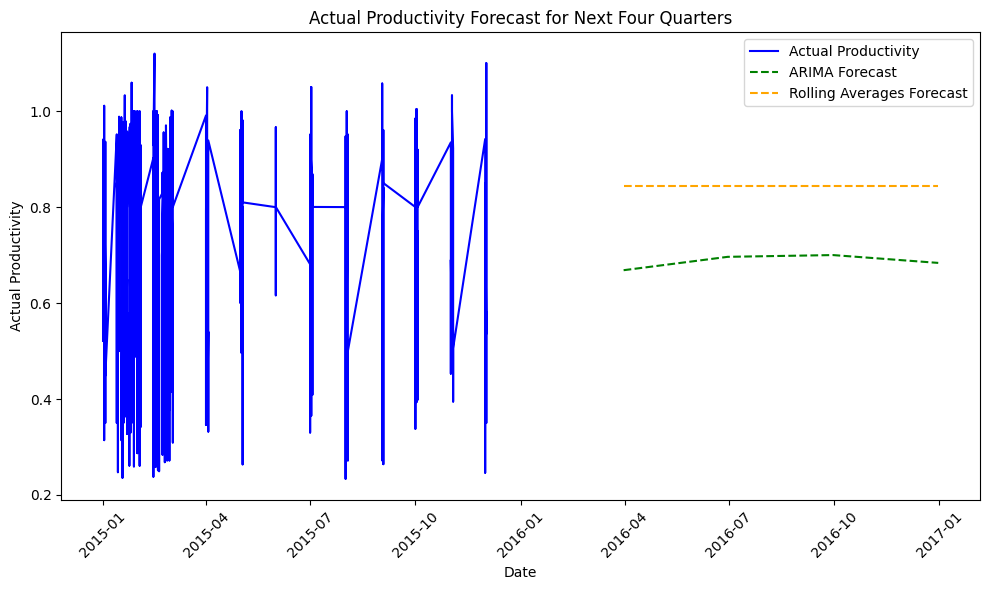

In [ ]:
funnel['Date_r'] = pd.to_datetime(funnel['Date'])

funnel.set_index('Date_r', inplace=True)

model = ARIMA(funnel['Actual Productivity'], order=(5,1,0))
results = model.fit()
forecast_arima = results.forecast(steps=4)

rolling_avg = funnel['Actual Productivity'].rolling(window=6).mean().iloc[-1]
forecast_rolling_avg = [rolling_avg] * 4

next_quarters = pd.date_range(start=funnel.index[-1], periods=5, freq='Q')[1:]

plt.figure(figsize=(10, 6))

plt.plot(funnel.index, funnel['Actual Productivity'], label='Actual Productivity', color='blue')

plt.plot(next_quarters, forecast_arima, label='ARIMA Forecast', linestyle='--', color='green')

plt.plot(next_quarters, forecast_rolling_avg, label='Rolling Averages Forecast', linestyle='--', color='orange')

plt.title('Actual Productivity Forecast for Next Four Quarters')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()